In [11]:
# Import necessary libraries

library(rvest)
library(tidyverse)
library(tidymodels)
library(tidyclust)
library(repr)
library(GGally)
options(repr.matrix.max.rows = 6)

In [12]:
maternal_health <- read_csv("maternal_health.csv")
new_col_names <- c("age", 
                    "systolic_blood_pressure", 
                    "diastolic_blood_pressure", 
                    "blood_glucose", 
                    "body_temperature", 
                    "heart_rate", 
                    "risk_level")
old_col_names <- colnames(maternal_health)
maternal_health <- maternal_health |> 
    rename_at(old_col_names, ~ new_col_names) |>
    filter(heart_rate >= 20)
maternal_health

Rows: 1014 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): RiskLevel
dbl (6): Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age systolic_blood_pressure diastolic_blood_pressure blood_glucose
1    25  130                     80                       15           
2    35  140                     90                       13           
3    29   90                     70                        8           
⋮    ⋮   ⋮                       ⋮                        ⋮            
1010 35   85                     60                       19           
1011 43  120                     90                       18           
1012 32  120                     65                        6           
     body_temperature heart_rate risk_level
1     98              86         high risk 
2     98              70         high risk 
3    100              80         high risk 
⋮    ⋮                ⋮          ⋮         
1010  98              86         high risk 
1011  98              70         high risk 
1012 101              76         mid risk

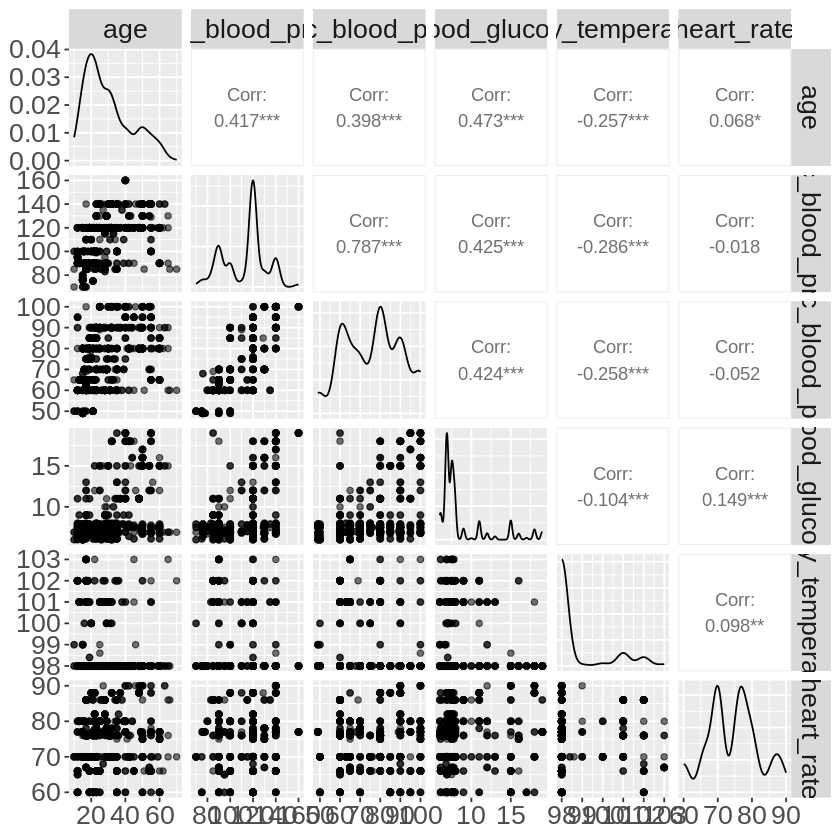

In [13]:
maternal_health_pairs <- maternal_health |> select(age:heart_rate) |>
    ggpairs(aes(alpha = 0.05)) +
    theme(text = element_text(size = 20))

maternal_health_pairs